In [4]:
import numpy as np
import matplotlib.pyplot as plt
import segyio
import matplotlib.patches as patches
from shapely.geometry import Polygon
import pandas as pd
import re

In [5]:
def read_seismic_cube(file_path):
    """
    :param file_path: Путь к файлу
    :return: возвращает куб в виде списков по Inlines, Xlines и Sampels (координаты x, y, z)
    а также словарю сейсмотрасс, где ключ это координата пересечения Inlines и Xlines, а значение это список значений сейсмотрасс
    """
    with segyio.open(file_path, 'r') as segyfile:
        x = list(segyfile.ilines)
        y = list(segyfile.xlines)
        z = list(segyfile.samples)
        cube = segyio.tools.cube(segyfile)
        traces = {f"{x[i]}_{y[j]}": cube[i][j][:] for i in range(len(x)) for j in range(len(y))}
    return x, y, z, traces

In [6]:
file_path = 'C:/HV/Seismic/Cube_TWT.segy'
ilines, xlines, samples_0, traces = read_seismic_cube(file_path)
samples = [int(i) for i in samples_0]

In [6]:
print(ilines)

[1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 116

In [7]:
print(xlines)

[5001, 5002, 5003, 5004, 5005, 5006, 5007, 5008, 5009, 5010, 5011, 5012, 5013, 5014, 5015, 5016, 5017, 5018, 5019, 5020, 5021, 5022, 5023, 5024, 5025, 5026, 5027, 5028, 5029, 5030, 5031, 5032, 5033, 5034, 5035, 5036, 5037, 5038, 5039, 5040, 5041, 5042, 5043, 5044, 5045, 5046, 5047, 5048, 5049, 5050, 5051, 5052, 5053, 5054, 5055, 5056, 5057, 5058, 5059, 5060, 5061, 5062, 5063, 5064, 5065, 5066, 5067, 5068, 5069, 5070, 5071, 5072, 5073, 5074, 5075, 5076, 5077, 5078, 5079, 5080, 5081, 5082, 5083, 5084, 5085, 5086, 5087, 5088, 5089, 5090, 5091, 5092, 5093, 5094, 5095, 5096, 5097, 5098, 5099, 5100, 5101, 5102, 5103, 5104, 5105, 5106, 5107, 5108, 5109, 5110, 5111, 5112, 5113, 5114, 5115, 5116, 5117, 5118, 5119, 5120, 5121, 5122, 5123, 5124, 5125, 5126, 5127, 5128, 5129, 5130, 5131, 5132, 5133, 5134, 5135, 5136, 5137, 5138, 5139, 5140, 5141, 5142, 5143, 5144, 5145, 5146, 5147, 5148, 5149, 5150, 5151, 5152, 5153, 5154, 5155, 5156, 5157, 5158, 5159, 5160, 5161, 5162, 5163, 5164, 5165, 5166, 516

In [77]:
print(samples)

[2142, 2144, 2146, 2148, 2150, 2152, 2154, 2156, 2158, 2160, 2162, 2164, 2166, 2168, 2170, 2172, 2174, 2176, 2178, 2180, 2182, 2184, 2186, 2188, 2190, 2192, 2194, 2196, 2198, 2200, 2202, 2204, 2206, 2208, 2210, 2212, 2214, 2216, 2218, 2220, 2222, 2224, 2226, 2228, 2230, 2232, 2234, 2236, 2238, 2240, 2242, 2244, 2246, 2248, 2250, 2252, 2254, 2256, 2258, 2260, 2262, 2264, 2266, 2268, 2270, 2272, 2274, 2276, 2278, 2280, 2282, 2284, 2286, 2288, 2290, 2292, 2294, 2296, 2298, 2300, 2302, 2304, 2306, 2308, 2310, 2312, 2314, 2316, 2318, 2320, 2322, 2324, 2326, 2328, 2330, 2332, 2334, 2336, 2338, 2340, 2342, 2344, 2346, 2348, 2350, 2352, 2354, 2356, 2358, 2360, 2362, 2364, 2366, 2368, 2370, 2372, 2374, 2376, 2378, 2380, 2382, 2384, 2386]


In [7]:
# проход по всем разломам и составление всех точек в один большой словарь

import os

def process_files(directory):
    files = os.listdir(directory)
    result = {}

    for file in files:
        if file.endswith('.txt'):
            with open(os.path.join(directory, file), 'r') as f:
                data = []
                for line in f:
                    fields = line.split()
                    if len(fields) == 8:
                        x = int(fields[1])
                        y = int(fields[2])
                        z = -int(float(fields[5]))
                        t = int(fields[7])
                        data.append([x, y, z, t])
                result[file] = data

    return result

# Пример использования
directory = 'C:/HV/Seismic/Faults_TWT_Charisma_fault_sticks_ASCII'
faults_original = process_files(directory)
print(faults_original)

{'Graben10_E.txt': [[1157, 5231, -1900, 1], [1157, 5194, -2505, 1], [1147, 5241, -1871, 2], [1147, 5201, -2489, 2], [1167, 5222, -1888, 3], [1167, 5188, -2511, 3], [1177, 5215, -1867, 4], [1177, 5180, -2511, 4], [1187, 5206, -1873, 5], [1187, 5173, -2496, 5], [1197, 5197, -1867, 6], [1197, 5162, -2511, 6]], 'Graben10_W.txt': [[1167, 5129, -1888, 1], [1167, 5158, -2509, 1], [1157, 5134, -1894, 2], [1157, 5165, -2492, 2], [1177, 5123, -1875, 3], [1177, 5151, -2488, 3], [1187, 5117, -1877, 4], [1187, 5143, -2491, 4], [1197, 5113, -1844, 5], [1197, 5139, -2508, 5], [1207, 5110, -1878, 6], [1207, 5133, -2514, 6], [1147, 5141, -1887, 7], [1147, 5173, -2483, 7], [1137, 5149, -1887, 8], [1137, 5182, -2483, 8]], 'Graben11_E.txt': [[1117, 5241, -1893, 1], [1117, 5208, -2499, 1], [1107, 5249, -1878, 2], [1107, 5217, -2488, 2], [1127, 5235, -1868, 3], [1127, 5204, -2495, 3], [1137, 5227, -1868, 4], [1137, 5194, -2482, 4], [1147, 5219, -1873, 5], [1147, 5183, -2476, 5]], 'Graben11_W.txt': [[1117, 5

In [7]:
for key in faults_original:
    print(key, len(faults_original[key]))

Graben10_E.txt 12
Graben10_W.txt 16
Graben11_E.txt 10
Graben11_W.txt 14
Graben12_E.txt 14
Graben12_W.txt 14
Graben13_E.txt 10
Graben13_W.txt 10
Graben14_E_half.txt 13
Graben15_E_half.txt 12
Graben16_E.txt 16
Graben16_W.txt 12
Graben17_W_half.txt 14
Graben18_W_half.txt 16
Graben19_E_half.txt 8
Graben1_E.txt 25
Graben1_W.txt 18
Graben2_E.txt 25
Graben2_W.txt 22
Graben3_E.txt 26
Graben3_W.txt 24
Graben4_E.txt 18
Graben4_W.txt 26
Graben5_E.txt 16
Graben5_W.txt 20
Graben6_E.txt 16
Graben6_W.txt 12
Graben7_E.txt 25
Graben7_W.txt 10
Graben8_W_half.txt 20
Graben9_W_half.txt 14


In [9]:
# карта  значений кровли и подошвы по координатам
maps_of_abs = {}
for key in traces:
    maps_of_abs[key] = [traces[key][0],traces[key][-1]]

In [10]:
"""
Сборка координат в один список попарно
Если точек больше 2, то берется минимальное и максимальное значение по глубинам
Если точка 1, то она не учитывается в разломах
"""
faults_final = []

for key in faults_original:
    dop_spisok = []
    z_spisok = []
    
    for i in range(len(faults_original[key])):
        if len(dop_spisok) == 0:
            dop_spisok.append(faults_original[key][i])
            z_spisok.append(faults_original[key][i][2])
        elif len(dop_spisok) == 1:
            if dop_spisok[0][3] == faults_original[key][i][3]:
                dop_spisok.append(faults_original[key][i])
                z_spisok.append(faults_original[key][i][2])
            else:
                dop_spisok.clear()
                z_spisok.clear()
                dop_spisok.append(faults_original[key][i])
                z_spisok.append(faults_original[key][i][2])
        elif len(dop_spisok) == 2:
            if dop_spisok[0][3] == faults_original[key][i][3]:
                dop_spisok.append(faults_original[key][i])
                z_spisok.append(faults_original[key][i][2])
            else:
                faults_final.append(dop_spisok[:])
                dop_spisok.clear()
                z_spisok.clear()
                dop_spisok.append(faults_original[key][i])
                z_spisok.append(faults_original[key][i][2])
        else:
            if dop_spisok[0][3] == faults_original[key][i][3]:
                dop_spisok.append(faults_original[key][i])
                z_spisok.append(faults_original[key][i][2])
            else:
                faults_final.append([dop_spisok[z_spisok.index(min(z_spisok))], dop_spisok[z_spisok.index(max(z_spisok))]])
                dop_spisok.clear()
                z_spisok.clear()
                dop_spisok.append(faults_original[key][i])
                z_spisok.append(faults_original[key][i][2])
        

In [29]:
print(faults_final)

[[[1157, 5231, -1900, 1], [1157, 5194, -2505, 1]], [[1147, 5241, -1871, 2], [1147, 5201, -2489, 2]], [[1167, 5222, -1888, 3], [1167, 5188, -2511, 3]], [[1177, 5215, -1867, 4], [1177, 5180, -2511, 4]], [[1187, 5206, -1873, 5], [1187, 5173, -2496, 5]], [[1167, 5129, -1888, 1], [1167, 5158, -2509, 1]], [[1157, 5134, -1894, 2], [1157, 5165, -2492, 2]], [[1177, 5123, -1875, 3], [1177, 5151, -2488, 3]], [[1187, 5117, -1877, 4], [1187, 5143, -2491, 4]], [[1197, 5113, -1844, 5], [1197, 5139, -2508, 5]], [[1207, 5110, -1878, 6], [1207, 5133, -2514, 6]], [[1147, 5141, -1887, 7], [1147, 5173, -2483, 7]], [[1117, 5241, -1893, 1], [1117, 5208, -2499, 1]], [[1107, 5249, -1878, 2], [1107, 5217, -2488, 2]], [[1127, 5235, -1868, 3], [1127, 5204, -2495, 3]], [[1137, 5227, -1868, 4], [1137, 5194, -2482, 4]], [[1117, 5136, -1900, 1], [1117, 5171, -2498, 1]], [[1127, 5131, -1883, 2], [1127, 5161, -2486, 2]], [[1137, 5127, -1880, 3], [1137, 5156, -2488, 3]], [[1107, 5140, -1899, 4], [1107, 5175, -2502, 4]],

In [20]:
def line_km(spisok):
    z_min = -2386
    z_max = -2142
    if ( -2142 < spisok[0][2]) and (spisok[1][2] < -2386):
        t1 = (z_max - spisok[0][2]) / (spisok[1][2] - spisok[0][2])
        x1 = round(spisok[0][0] + (spisok[1][0] - spisok[0][0])*t1)
        y1 = round(spisok[0][1] + (spisok[1][1] - spisok[0][1])*t1)
        z1 = z_max
        
        t2 = (z_min - spisok[0][2]) / (spisok[1][2] - spisok[0][2])
        x2 = round(spisok[0][0] + (spisok[1][0] - spisok[0][0])*t2)
        y2= round(spisok[0][1] + (spisok[1][1] - spisok[0][1])*t2)
        z2 = z_min
        return [[x1, y1, z1], [x2, y2, z2], 0]
    elif ( -2142 > spisok[0][2]) and (spisok[1][2] < -2386):
        t2 = (z_min - spisok[0][2]) / (spisok[1][2] - spisok[0][2])
        x2 = round(spisok[0][0] + (spisok[1][0] - spisok[0][0])*t2)
        y2= round(spisok[0][1] + (spisok[1][1] - spisok[0][1])*t2)
        z2 = z_min
        return [[spisok[0][0], spisok[0][1], spisok[0][2]], [x2, y2, z2], 1]
    elif ( -2142 < spisok[0][2]) and (spisok[1][2] > -2386):
        t1 = (z_max - spisok[0][2]) / (spisok[1][2] - spisok[0][2])
        x1 = round(spisok[0][0] + (spisok[1][0] - spisok[0][0])*t1)
        y1 = round(spisok[0][1] + (spisok[1][1] - spisok[0][1])*t1)
        z1 = z_max
        return [[x1, y1, z1], [spisok[1][0], spisok[1][1], spisok[1][2]], 2]
    else:
        return [[spisok[0][0], spisok[0][1], spisok[0][2]], [spisok[1][0], spisok[1][1], spisok[1][2]], 3]
        
 

In [21]:
print(line_km([[1347, 5142, -1888, 4], [1347, 5174, -2488, 4]]))

[[1347, 5156, -2142], [1347, 5169, -2386], 0]


In [22]:
z_min = -2386
z_max = -2142
faults_to_cube = []
for i in range(len(faults_final)):
    faults_to_cube.append(line_km(faults_final[i]))
    

In [23]:
print(faults_to_cube)

[[[1157, 5216, -2142], [1157, 5201, -2386], 0], [[1147, 5223, -2142], [1147, 5208, -2386], 0], [[1167, 5208, -2142], [1167, 5195, -2386], 0], [[1177, 5200, -2142], [1177, 5187, -2386], 0], [[1187, 5192, -2142], [1187, 5179, -2386], 0], [[1167, 5141, -2142], [1167, 5152, -2386], 0], [[1157, 5147, -2142], [1157, 5160, -2386], 0], [[1177, 5135, -2142], [1177, 5146, -2386], 0], [[1187, 5128, -2142], [1187, 5139, -2386], 0], [[1197, 5125, -2142], [1197, 5134, -2386], 0], [[1207, 5120, -2142], [1207, 5128, -2386], 0], [[1147, 5155, -2142], [1147, 5168, -2386], 0], [[1117, 5227, -2142], [1117, 5214, -2386], 0], [[1107, 5235, -2142], [1107, 5222, -2386], 0], [[1127, 5221, -2142], [1127, 5209, -2386], 0], [[1137, 5212, -2142], [1137, 5199, -2386], 0], [[1117, 5150, -2142], [1117, 5164, -2386], 0], [[1127, 5144, -2142], [1127, 5156, -2386], 0], [[1137, 5139, -2142], [1137, 5151, -2386], 0], [[1107, 5154, -2142], [1107, 5168, -2386], 0], [[1097, 5162, -2142], [1097, 5177, -2386], 0], [[1087, 5172

In [42]:
print(len(maps_of_abs))

380664


In [ ]:
def show_map(f):
    # Извлечение данных для отрисовки
    points = []
    values = []
    for coord_str, value in maps_of_abs.items():
        x, y = map(int, coord_str.split('_'))
        points.append((x, y))
        values.append(value[f]) #тут приходит список поменять на кровлю и подошву

    # Создание графика
    plt.figure(figsize=(10, 10))
    scatter = plt.scatter(x=list(zip(*points))[0], y=list(zip(*points))[1], c=values)
    plt.xticks([ilines[0], ilines[100], ilines[200], ilines[300], ilines[400], ilines[500], ilines[-1]])
    plt.yticks([xlines[0], xlines[100], xlines[200], xlines[300], xlines[400], xlines[500], xlines[-1]])
    plt.xlabel('Инлайны')
    plt.ylabel('Кросслайны')
    plt.colorbar(scatter, label='Шкала средних значений сейсмотрасс')

    for i in range(len(faults_to_cube)):
        x_coords = [point[0] for point in faults_to_cube[i]]
        y_coords = [point[1] for point in faults_to_cube[i]]
        plt.plot(x_coords, y_coords, color='red', linewidth=2)  # Линия красного цвета с толщиной 2

    plt.grid(False)  # Отключение сетки
    plt.show()

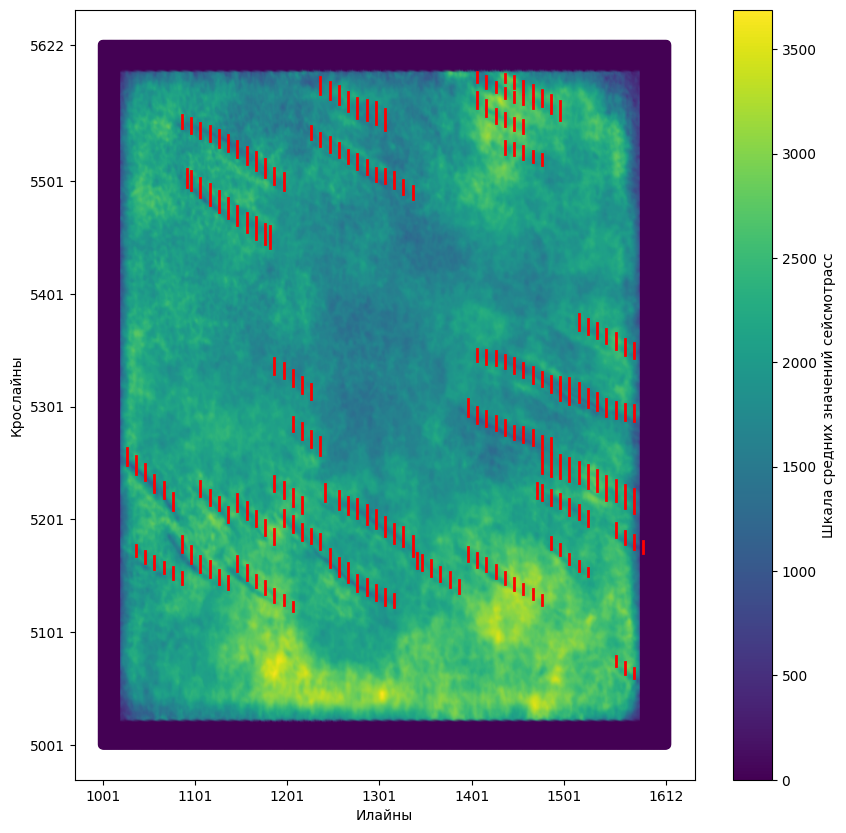

In [13]:
# срез карты по осям ХУ 
import matplotlib.pyplot as plt

# Извлечение данных для отрисовки
points = []
values = []
for coord_str, value in maps_of_abs.items():
    x, y = map(int, coord_str.split('_'))
    points.append((x, y))
    values.append(value) #тут приходит список поменять на кровлю и подошву

# Создание графика
plt.figure(figsize=(10, 10))
scatter = plt.scatter(x=list(zip(*points))[0], y=list(zip(*points))[1], c=values)
#plt.xticks(range(min(points, key=lambda x: x[0])[0], max(points, key=lambda x: x[0])[0] + 100))
#plt.yticks(range(min(points, key=lambda x: x[1])[1], max(points, key=lambda x: x[1])[1] + 100))
plt.xticks([ilines[0], ilines[100], ilines[200], ilines[300], ilines[400], ilines[500], ilines[-1]])
plt.yticks([xlines[0], xlines[100], xlines[200], xlines[300], xlines[400], xlines[500], xlines[-1]])
plt.xlabel('Инлайны')
plt.ylabel('Кросслайны')
plt.colorbar(scatter, label='Шкала средних значений сейсмотрасс')

for i in range(len(faults_to_cube)):
    x_coords = [point[0] for point in faults_to_cube[i]]
    y_coords = [point[1] for point in faults_to_cube[i]]
    plt.plot(x_coords, y_coords, color='red', linewidth=2)  # Линия красного цвета с толщиной 2

plt.grid(False)  # Отключение сетки
plt.show()


In [70]:
print(traces['1111_5200'])

[  1147.9019    1658.0804    1913.1697    2040.7144    2040.7144
   1785.625     1530.5358    1275.4464    1020.3572     892.8125
    765.2679     765.2679     765.2679     765.2679     637.7232
    510.1786     382.63394    127.54465   -127.54465   -255.0893
   -510.1786    -765.2679    -892.8125   -1147.9019   -1402.9911
  -1530.5358   -1658.0804   -1658.0804   -1402.9911    -892.8125
   -255.0893     510.1786    1530.5358    2550.8928    3316.161
   3826.3394    3826.3394    3061.0715    1530.5358    -637.7232
  -3443.7056   -6504.777    -9438.304   -11606.5625  -12626.92
 -11989.196    -9820.9375   -6377.2324   -2040.7144    2550.8928
   6504.777     9310.759    10713.75     10458.661     8800.581
   6504.777     3826.3394    1530.5358    -255.0893   -1147.9019
  -1275.4464    -892.8125    -127.54465    510.1786    1020.3572
   1147.9019    1147.9019     892.8125     382.63394   -127.54465
   -637.7232   -1275.4464   -1785.625    -2423.3484   -2805.9822
  -2933.5269   -2805.9822   

In [14]:
X = ilines[len(ilines) // 2]
map_xlines_samples = {}
for i in range(len(xlines)):
    for j in range(len(samples)):
        map_xlines_samples[f"{xlines[i]}_{samples[j]}"] = traces[f"{X}_{xlines[i]}"][j]

In [80]:
print(samples)

[2142, 2144, 2146, 2148, 2150, 2152, 2154, 2156, 2158, 2160, 2162, 2164, 2166, 2168, 2170, 2172, 2174, 2176, 2178, 2180, 2182, 2184, 2186, 2188, 2190, 2192, 2194, 2196, 2198, 2200, 2202, 2204, 2206, 2208, 2210, 2212, 2214, 2216, 2218, 2220, 2222, 2224, 2226, 2228, 2230, 2232, 2234, 2236, 2238, 2240, 2242, 2244, 2246, 2248, 2250, 2252, 2254, 2256, 2258, 2260, 2262, 2264, 2266, 2268, 2270, 2272, 2274, 2276, 2278, 2280, 2282, 2284, 2286, 2288, 2290, 2292, 2294, 2296, 2298, 2300, 2302, 2304, 2306, 2308, 2310, 2312, 2314, 2316, 2318, 2320, 2322, 2324, 2326, 2328, 2330, 2332, 2334, 2336, 2338, 2340, 2342, 2344, 2346, 2348, 2350, 2352, 2354, 2356, 2358, 2360, 2362, 2364, 2366, 2368, 2370, 2372, 2374, 2376, 2378, 2380, 2382, 2384, 2386]


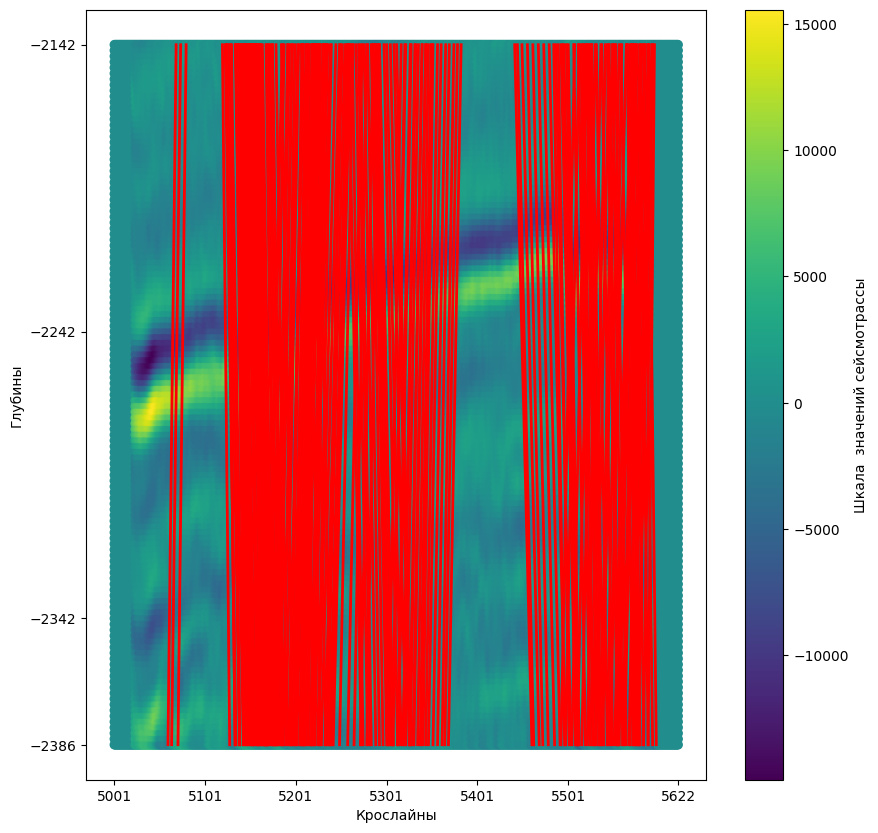

In [15]:
# Извлечение данных для отрисовки
points = []
values = []
for coord_str, value in map_xlines_samples.items():
    x, y = map(int, coord_str.split('_'))
    points.append((x, y*(-1)))
    values.append(value)

# Создание графика
plt.figure(figsize=(10, 10))
scatter = plt.scatter(x=list(zip(*points))[0], y=list(zip(*points))[1], c=values)
#plt.xticks(range(min(points, key=lambda x: x[0])[0], max(points, key=lambda x: x[0])[0] + 100))
#plt.yticks(range(min(points, key=lambda x: x[1])[1], max(points, key=lambda x: x[1])[1] + 100))
plt.xticks([xlines[0], xlines[100], xlines[200], xlines[300], xlines[400], xlines[500], xlines[-1]])
plt.yticks([(-1)*samples[0], (-1)*samples[50], (-1)*samples[100], (-1)*samples[-1]])
plt.xlabel('Крослайны')
plt.ylabel('Глубины')
plt.colorbar(scatter, label='Шкала  значений сейсмотрассы')

for i in range(len(faults_to_cube)):
    x_coords = [point[1] for point in faults_to_cube[i]]
    y_coords = [point[2] for point in faults_to_cube[i]]
    plt.plot(x_coords, y_coords, color='red', linewidth=2)  # Линия красного цвета с толщиной 2

plt.grid(False)  # Отключение сетки
plt.show()

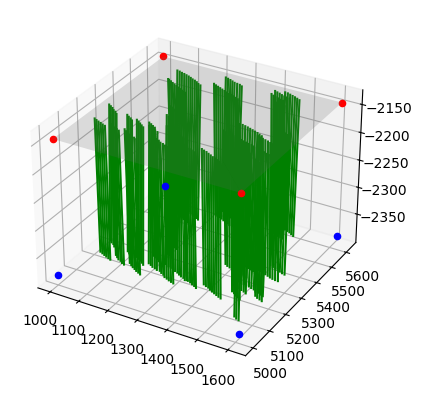

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Координаты вершин куба
A = np.array([1001, 5001, -2142])
B = np.array([1612, 5001, -2142])
C = np.array([1612, 5622, -2142])
D = np.array([1001, 5622, -2142])
A1 = np.array([1001, 5001, -2386])
B1 = np.array([1612, 5001, -2386])
C1 = np.array([1612, 5622, -2386])
D1 = np.array([1001, 5622, -2386])



# Создание трехмерного графика
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Построение графика куба
ax.scatter(A[0], A[1], A[2], c='r')
ax.scatter(B[0], B[1], B[2], c='r')
ax.scatter(C[0], C[1], C[2], c='r')
ax.scatter(D[0], D[1], D[2], c='r')
ax.scatter(A1[0], A1[1], A1[2], c='b')
ax.scatter(B1[0], B1[1], B1[2], c='b')
ax.scatter(C1[0], C1[1], C1[2], c='b')
ax.scatter(D1[0], D1[1], D1[2], c='b')
ax.plot_trisurf([A[0], B[0], C[0], D[0], A1[0], B1[0], C1[0], D1[0]],
                [A[1], B[1], C[1], D[1], A1[1], B1[1], C1[1], D1[1]],
                [A[2], B[2], C[2], D[2], A1[2], B1[2], C1[2], D1[2]],
                color='gray', alpha=0.2)

for i in range(len(faults_to_cube)):
    K = faults_to_cube[i][0]
    N = faults_to_cube[i][1]
    ax.plot([K[0], N[0]], [K[1], N[1]], [K[2], N[2]], c='g')
# Координаты точек K и N
#K = np.array([1287, 5231, -1884])
#N = np.array([1287, 5189, -2504])

# Построение графика линии KN
#ax.plot([K[0], N[0]], [K[1], N[1]], [K[2], N[2]], c='g')

# Отображение графика
plt.show()